# Project Final Report

### Due: Midnight on April 27 (2-hour grace period) — 50 points  

### No late submissions will be accepted.


## Overview

Your final submission consists of **three components**:

---

### 1. Final Report Notebook [40 pts]

Complete all sections of this notebook to document your final decisions, results, and broader context.

- **Part A**: Select the single best model from your Milestone 2 experiments. Now that you’ve finalized your model, revisit your decisions from Milestones 1 and 2. Are there any steps you would change—such as cleaning, feature engineering, or model evaluation—given what you now know?

- **Part B**: Write a technical report following standard conventions, for example:
  - [CMU guide to structure](https://www.stat.cmu.edu/~brian/701/notes/paper-structure.pdf)
  - [Data science report example](https://www.projectpro.io/article/data-science-project-report/620)
  - The Checklist given in this week's Blackboard Lesson (essentially the same as in HOML).
    
  Your audience here is technically literate but unfamiliar with your work—like your manager or other data scientists. Be clear, precise, and include both code (for illustration), charts/plots/illustrations, and explanation of what you discovered and your reasoning process. 

The idea here is that Part A would be a repository of the most important code, for further work to come, and Part B is
the technical report which summarizes your project for the data science group at your company. Do NOT assume that readers of Part B are intimately familiar with Part A; provide code for illustration as needed, but not to run.

Submit this notebook as a group via your team leader’s Gradescope account.

---

### 2. PowerPoint Presentation [10 pts]

Create a 10–15 minute presentation designed for a general audience (e.g., sales or marketing team).

- Prepare 8–12 slides, following the general outline of the sections of Part B. 
- Focus on storytelling, visuals (plots and illustrations), and clear, simplified language. No code!
- Use any presentation tool you like, but upload a PDF version.
- List all team members on the first slide.

Submit as a group via your team leader’s Gradescope account.

---

### 3. Individual Assessment

Each team member must complete the Individual Assessment Form (same as in Milestone 1), sign it, and upload it via their own Gradescope account.

---

## Submission Checklist

-  Final Report Notebook — Team leader submission
-  PDF Slides — Team leader submission
-  Individual Assessment Form — Each member submits their own


## Part A: Final Model and Design Reassessment [10 pts]

In this part, you will finalize your best-performing model and revisit earlier decisions to determine if any should be revised in light of your complete modeling workflow. You’ll also consolidate and present the key code used to run your model on the preprocessed dataset, with thoughtful documentation of your reasoning.

**Requirements:**

- Reconsider **at least one decision from Milestone 1** (e.g., preprocessing, feature engineering, or encoding). Explain whether you would keep or revise that decision now that you know which model performs best. Justify your reasoning.
  
- Reconsider **at least one decision from Milestone 2** (e.g., model evaluation, cross-validation strategy, or feature selection). Again, explain whether you would keep or revise your original decision, and why.

- Below, include all code necessary to **run your final model** on the processed dataset. This section should be a clean, readable summary of the most important steps from Milestones 1 and 2, adapted as needed to fit your final model choice and your reconsiderations as just described. 

- Use Markdown cells and inline comments to explain the structure of the code clearly but concisely. The goal is to make your reasoning and process easy to follow for instructors and reviewers.

> Remember: You are not required to change your earlier choices, but you *are* required to reflect on them and justify your final decisions.


In Milestone 1, we performed extensive data processing and preparation in an effort to capture all opportunities available in the data. However, Milestone 2 revealed some additional rooms for improvement which we will explore.



In [2]:
# ===================================
# Useful Imports: Add more as needed
# ===================================

# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations
from math import sqrt
import matplotlib.pyplot as plt

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars
import seaborn as sns

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import pandas as pd

# Progress Tracking

from tqdm import tqdm

# =============================
# Global Variables
# =============================
random_state = 42

# =============================
# Utility Functions
# =============================

# Format y-axis labels as dollars with commas (optional)
def dollar_format(x, pos):
    return f'${x:,.0f}'

# Convert seconds to HH:MM:SS format
def format_hms(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))



In [3]:
df = pd.read_csv("zillow_cleaned.csv")
df.head()
target = "taxvaluedollarcnt"
X = df.drop(columns=["taxvaluedollarcnt", "parcelid"])  # drop ID and target
y = df[target]
X_numeric = X.select_dtypes(include=["int64", "float64"])

# Drop columns that have any missing values
X_numeric_clean = X_numeric.dropna(axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric_clean, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [3]:
# RMSE scorer
rmse_scorer = make_scorer(mean_squared_error)

# Repeated K-Fold Cross-Validation
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Models with default parameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Collect results
results = []

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_scaled,
        y_train,
        scoring=rmse_scorer,
        cv=cv,
        n_jobs=-1
    )
    results.append({
        "Model": name,
        "Mean RMSE": sqrt(np.mean(scores)),
        "Std RMSE": sqrt(np.std(scores))
    })

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.511e+15, tolerance: 1.736e+12
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.605e+15, tolerance: 1.781e+12
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+15, toler

The feature engineering performed to reach the above stage of data in Milestone 1 followed a comprehensive workflow: cleaning problematic data, handling missing values, transforming features to better expose underlying patterns, and selecting the most influential features for modeling. The transformation techniques (normalization, log transformation, and ratio creation) were systematically evaluated for their impact on correlation with the target variable.

In [4]:
results_df_log = pd.DataFrame(results)
print(results_df_log)

NameError: name 'results' is not defined

In [5]:

from statistics import mean, median, mode


df = pd.read_csv('zillow_cleaned.csv')

# Calculate the Pearson correlation between 'garagetotalsqft' and 'taxvaluedollarcnt'
correlation = df['garagetotalsqft'].corr(df['taxvaluedollarcnt'])
print("Correlation between garagetotalsqft and taxvaluedollarcnt before feature engineering:", correlation)


data =df['garagetotalsqft']
mean_value = mean(data)
median_value = median(data)
mode_value = mode(data)

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

df['garagetotalsqft'] = df['garagetotalsqft'].replace(0, pd.NA)

# Fill garagetotalsqft with 120 where garagecarcnt > 0 and garagetotalsqft is empty/NaN/0
df.loc[(df['garagecarcnt'] > 0) & (df['garagetotalsqft'].isna()), 'garagetotalsqft'] = 120

correlation = df['garagetotalsqft'].corr(df['taxvaluedollarcnt'])
print("Correlation between garagetotalsqft and taxvaluedollarcnt after feature engineering:", correlation)
df.to_csv('zillow_cleaned_filled.csv', index=False)



Correlation between garagetotalsqft and taxvaluedollarcnt before feature engineering: 0.15174076035146158
Mean: 120.89180956525287
Median: 0.0
Mode: 0.0
Correlation between garagetotalsqft and taxvaluedollarcnt after feature engineering: 0.3868886263044508


Additional inconsistencies were found on "garagetotalsqft" after milestone 1 and 2 were completed  after noticing that "garagetotalsqft" was consistently not selected during the feature selection process.</br>

Looking into the feature more closely. We found that there were rows where the garage is reported to be present but sqr footage was not reported. We thought this was a missed opportunity.</br>

We further cleaned the data by filling in the discrepancies where square footage of the garage was not calculated with a garage reported by filling these with the mean square footage of the house.</br>

This resulted in a more consistent correlation value between the house valuation and the garage square footage.
</br>

Before feature engineering, correlation between “taxvaluedollarcnt” and “garagetotalsqft” was 0.15. After feature engineering correlation showed 0.39. While still not highly correlated. We believe that more opportunities are captured with this processing as it does not make sense to process houses with garages big enough to house a car does not have it’s square footage calculated in to the prediction.


In [6]:
df_filled = pd.read_csv("zillow_cleaned_filled.csv")
df_filled.head()
target = "taxvaluedollarcnt"
X = df_filled.drop(columns=["taxvaluedollarcnt", "parcelid"])  # drop ID and target
y = df_filled[target]
X_numeric = X.select_dtypes(include=["int64", "float64"])

# Drop columns that have any missing values
X_numeric_clean = X_numeric.dropna(axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric_clean, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

We will now perform preliminary exploratory data analysis and data verification.

In [18]:
#Verified all rows engineered.
#No data with garage reported but footage not reported.
df_filled[(df_filled['garagecarcnt'] > 0) & (df_filled['garagetotalsqft'].isnull())]
#No data with garage is not reported but footage is reported.
df_filled[(df_filled['garagecarcnt'] == 0) & (df_filled['garagetotalsqft'] > 0)]



,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fireplacecnt,fullbathcnt,...,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,assessmentyear,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,taxvaluedollarcnt


In [25]:
df_numeric = df_filled.select_dtypes(include=["int64", "float64"])

In [34]:

def analyze_each_column(data):
    

    mean_values = data.mean()
    median_values = data.median()
    mode_values = data.mode().iloc[0]  # Take the first mode if multiple

    # Create a DataFrame to store the results
    summary_df = pd.DataFrame({
        'Column': mean_values.index,
        'Mean': mean_values,
        'Median': median_values,
        'Mode': mode_values
    })

    return summary_df



df_eda = analyze_each_column(df_numeric)
print(df_eda.round(2).to_string())

                                                    Column          Mean        Median          Mode
parcelid                                          parcelid  1.297838e+07  1.255845e+07  1.072286e+07
airconditioningtypeid                airconditioningtypeid  6.100000e-01  0.000000e+00  0.000000e+00
bathroomcnt                                    bathroomcnt  2.280000e+00  2.000000e+00  2.000000e+00
bedroomcnt                                      bedroomcnt  3.020000e+00  3.000000e+00  3.000000e+00
buildingqualitytypeid                buildingqualitytypeid  4.230000e+00  6.000000e+00  0.000000e+00
calculatedbathnbr                        calculatedbathnbr  2.280000e+00  2.000000e+00  2.000000e+00
calculatedfinishedsquarefeet  calculatedfinishedsquarefeet  1.757090e+03  1.521000e+03  1.200000e+03
finishedsquarefeet12                  finishedsquarefeet12  1.757090e+03  1.521000e+03  1.200000e+03
fireplacecnt                                  fireplacecnt  1.300000e-01  0.000000e+00  0.0

In [28]:
# Forward Feature Selection

def forward_feature_selection(X, y, model, 
                              scoring='neg_mean_squared_error', 
                              cv=5, 
                              tol=None,               # None = no delta cutoff
                                                      # use 0.0 for "no further improvements"
                                                      # and 1e-4 for "point of diminishing returns"                                      
                              max_features=None,      # None = use all features
                              n_jobs=-1,
                              verbose=False,
                             ):
    selected_features = []                            # List to store the order of features selected
    remaining_features = list(X.columns)              # Features not yet selected
    best_scores = []                                  # List to store the CV score after each feature addition
    previous_score = float('inf')                     # Initialize previous score for improvement comparison

    # Track the best subset of features and its corresponding score
    
    best_feature_set = None                           # Best combination of features found so far
    best_score = float('inf')                         # Best CV score observed so far
    
    while remaining_features:
        scores = {}                                   # Dictionary to hold CV scores for each candidate feature
        for feature in remaining_features:
            current_features = selected_features + [feature]
            
            # Compute the CV score for the current set of features (negated MSE, so lower is better)
            # EDIT: Compute the RMSE here scoring alread uses "neg mean squared"
            cv_score = -cross_val_score(model, X[current_features], y, 
                                        scoring=scoring, cv=cv, n_jobs=n_jobs
                                       ).mean()
            scores[feature] = cv_score

        # Select the feature that minimizes the CV score
        best_feature = min(scores, key=scores.get)
        current_score = scores[best_feature]
            
        # Check if the improvement is significant based on the tolerance (tol)
        if tol is not None and previous_score - current_score < tol:
            if verbose:
                print("Stopping early due to minimal improvement.")
            break

        # Add the best feature to the selected list and update score trackers
        selected_features.append(best_feature)
        best_scores.append(current_score)
        remaining_features.remove(best_feature)
        previous_score = current_score

        if verbose:
            print(f"\nFeatures: {selected_features[-3:]}, CV Score (RMSE): {current_score:.4f}")
        
        # Update the best subset if the current score is better than the best so far
        if current_score < best_score:
            best_score = current_score
            best_feature_set = selected_features.copy()
        
        # Check if the maximum number of features has been reached
        if max_features is not None and len(selected_features) >= max_features:
            break

    return (
        selected_features,      # List of features in the order they were selected (this will be ALL features if max_features == None
        best_scores,            # List of cross-validation scores corresponding to each addition in the previous list
        best_feature_set,       # The subset of features that achieved the best CV score.
        best_score              # The best CV score
    )


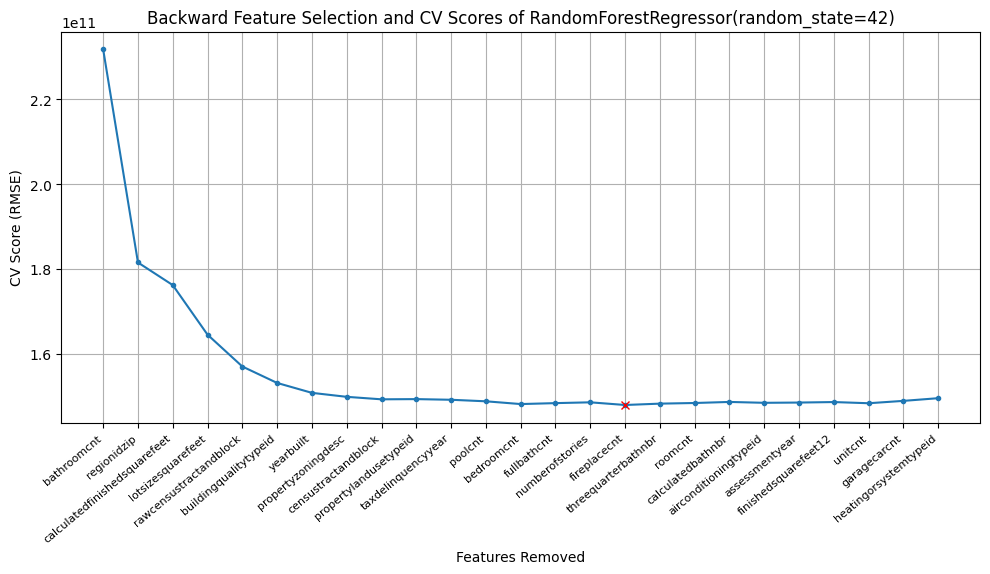

Best feature set: ['bathroomcnt', 'regionidzip', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'rawcensustractandblock', 'buildingqualitytypeid', 'yearbuilt', 'propertyzoningdesc', 'censustractandblock', 'propertylandusetypeid', 'taxdelinquencyyear', 'poolcnt', 'bedroomcnt', 'fullbathcnt', 'numberofstories', 'fireplacecnt']
CV score (RMSE): 147978746733.9236


In [29]:
models_selection = {
    #LinearRegression(),
    #Ridge(),
    #Lasso(),
    #DecisionTreeRegressor(random_state=42),
    #BaggingRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    #GradientBoostingRegressor(random_state=42)
}

for model in models_selection:
    selected_features, best_scores, best_feature_set, best_score = (
    forward_feature_selection(X_train, y_train, model, verbose=False))

    plt.figure(figsize=(10, 6))
    plt.title(f"Backward Feature Selection and CV Scores of {model}")
    plt.plot(range(1, len(best_scores) + 1), best_scores, marker='.')
    index = np.argmin(best_scores) 
    plt.plot([index + 1], best_scores[index], marker='x', color='red')  
    plt.xticks(range(1, len(selected_features) + 1), selected_features, rotation=40, ha='right', fontsize=8)
    plt.xlabel('Features Removed')
    plt.ylabel('CV Score (RMSE)')
    plt.grid()
    plt.tight_layout()
    plt.show()

    print("Best feature set:", best_feature_set)
    print("CV score (RMSE):",np.around(best_score,4))

In [31]:
def sweep_parameter(model,
                    Parameters,
                    param,
                    parameter_list,
                    X_train          = X_train,
                    y_train          = y_train,
                    X_test           = X_test,
                    y_test           = y_test,
                    verbose          = True,
                    show_rmse        = True,
                    n_iter_no_change = None,
                    delta            = 0.001,
                    n_jobs           = -1,
                    n_repeats        = 10):
    
    start = time.time()
    Parameters = Parameters.copy()  # Avoid modifying the original dictionary
    
    cv_mses, std_cvs, train_mses, test_mses = [], [], [], []
    no_improve_count = 0
    best_mse = float('inf')
    
    # Run over each value in parameter_list
    for p in tqdm(parameter_list, desc=f"Sweeping {param}"):
        Parameters[param] = p
        P_temp = Parameters.copy()
        # Remove MSE_found if present, just in case
        P_temp.pop('MSE_found', None)
        
        cv_mse, std_cv, train_mse, test_mse = run_model(
            model=model,
            X_train=X_train, y_train=y_train,
            X_test=X_test,   y_test=y_test,
            n_repeats=n_repeats,
            n_jobs=n_jobs,
            **P_temp
        )
        cv_mses.append(cv_mse)
        std_cvs.append(std_cv)
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        
        # Early-stopping logic
        if cv_mse < best_mse - delta:
            best_mse = cv_mse
            no_improve_count = 0
        else:
            no_improve_count += 1
        
        if n_iter_no_change is not None and no_improve_count >= n_iter_no_change:
            print(f"Early stopping: No improvement after {n_iter_no_change} iterations.")
            break
    
    # Identify best parameter
    min_cv_mse = min(cv_mses)
    min_index = cv_mses.index(min_cv_mse)
    best_param = parameter_list[min_index]
    Parameters[param] = best_param
    Parameters['MSE_found'] = min_cv_mse
    
    if verbose:
        # Prepare for plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
        
        # We only need as many parameter values as we actually computed
        partial_param_list = parameter_list[:len(cv_mses)]
        
        # Check if our parameter list is Boolean so we can label accordingly
        is_boolean = all(isinstance(val, bool) for val in partial_param_list)
        if is_boolean:
            # Convert booleans to integer indices for plotting
            x_vals = list(range(len(partial_param_list)))
            x_labels = [str(val) for val in partial_param_list]
        else:
            # Treat numeric or other types as-is
            x_vals = partial_param_list
            x_labels = partial_param_list
        
        error_name = 'RMSE' if show_rmse else 'MSE'
        
        # ----- First plot: (R)MSE -----
        ax1.set_title(f"{error_name} vs {param}")
        
        # Apply dollar formatting ONLY if we're showing RMSE
        if show_rmse:
            ax1.yaxis.set_major_formatter(mticker.FuncFormatter(dollar_format))
        
        # Plot lines
        ax1.plot(x_vals,
                 np.sqrt(cv_mses) if show_rmse else cv_mses,
                 marker='.', label=f"CV {error_name}", color='blue')
        ax1.plot(x_vals,
                 np.sqrt(train_mses) if show_rmse else train_mses,
                 marker='.', label=f"Train {error_name}", color='green')
        ax1.plot(x_vals,
                 np.sqrt(test_mses) if show_rmse else test_mses,
                 linestyle='--', label=f"Test {error_name}", color='orange')
        ax1.scatter([x_vals[min_index]],
                    [np.sqrt(min_cv_mse) if show_rmse else min_cv_mse],
                    marker='x', label=f"Best CV {error_name}", color='red')
        
        ax1.set_ylabel(error_name)
        ax1.legend()
        ax1.grid()
        
        # ----- Second plot: CV Std Dev -----
        ax2.set_title(f"CV Standard Deviation vs {param}")
        ax2.plot(x_vals, std_cvs, marker='.', label=f"CV {error_name} Std", color='blue')
        ax2.set_xlabel(param)
        ax2.set_ylabel("Standard Deviation")
        ax2.legend()
        ax2.grid(alpha=0.5)
        
        # If we are using boolean x-values, set custom ticks
        if is_boolean:
            ax2.set_xticks(x_vals)
            ax2.set_xticklabels(x_labels)
        
        plt.tight_layout()
        plt.show()
        
        end = time.time()
        print("Execution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))
    
    return Parameters


In [32]:
Default_Parameters_Random_Forests = {
    'n_estimators': 100,         # Number of base estimators in the ensemble
    'max_features': None,        # Number of features to consider when looking for the best split 
    'max_depth'   : None,        # Limits the depth of each tree
    'bootstrap'   : True,        # Use bootstrap samples when building estimators
    'random_state': 42,          # Ensures reproducibility
    'MSE_found'   : float('inf') # Used for tracking the best MSE during parameter sweeps, to record result of these parameter choices
                   
}

In [33]:
Params_RF = Default_Parameters_Random_Forests.copy()
Params_RF_List = []

In [47]:
def run_model(model, X_train, y_train, X_test, y_test, n_repeats=10, n_jobs=-1, **model_params):

    # Instantiate the model if a class is provided, so for example can use either BaggingRegressor or BaggingRegressor() as argument. 
    if isinstance(model, type):
        model = model(**model_params)

    neg_mse_scores = cross_val_score(model, X_train, y_train,scoring = 'neg_mean_squared_error',
                                     cv = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42), n_jobs  = n_jobs)
    
    mean_cv_mse = -np.mean(neg_mse_scores)
    std_cv_mse  = np.std(neg_mse_scores)
    
    # Fit the model on the full training set
    model.fit(X_train, y_train)
    
    # Compute training MSE and testing MSE
    train_preds = model.predict(X_train)
    train_mse   = mean_squared_error(y_train, train_preds)
    test_preds  = model.predict(X_test)
    test_mse    = mean_squared_error(y_test, test_preds)
    
    return mean_cv_mse, std_cv_mse, train_mse, test_mse


Sweeping n_estimators:   5%|▍         | 1/21 [03:32<1:10:57, 212.86s/it]/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Sweeping n_estimators: 100%|██████████| 21/21 [1:52:24<00:00, 321.19s/it]


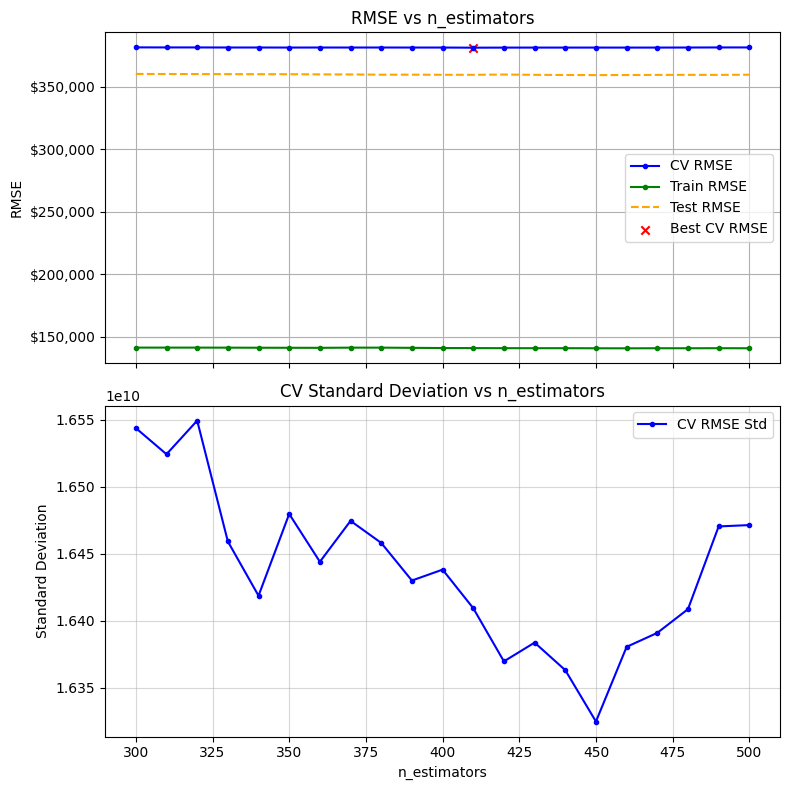

Execution Time: 01:52:25

Parameter n_estimators = 410 RMSE = $381,318.23

{'n_estimators': 410, 'max_features': 15, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145403590281.58295}


Sweeping max_features: 100%|██████████| 21/21 [2:23:23<00:00, 409.70s/it]  


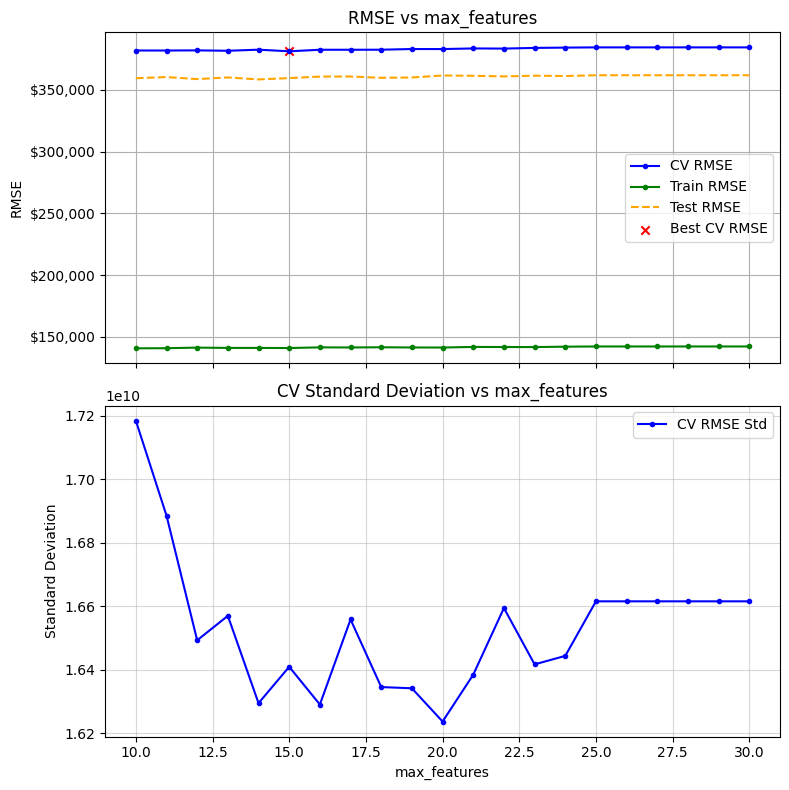

Execution Time: 02:23:23

Parameter max_features = 15 RMSE = $381,318.23

{'n_estimators': 410, 'max_features': 15, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145403590281.58295}


Sweeping max_depth: 100%|██████████| 20/20 [1:45:07<00:00, 315.35s/it]


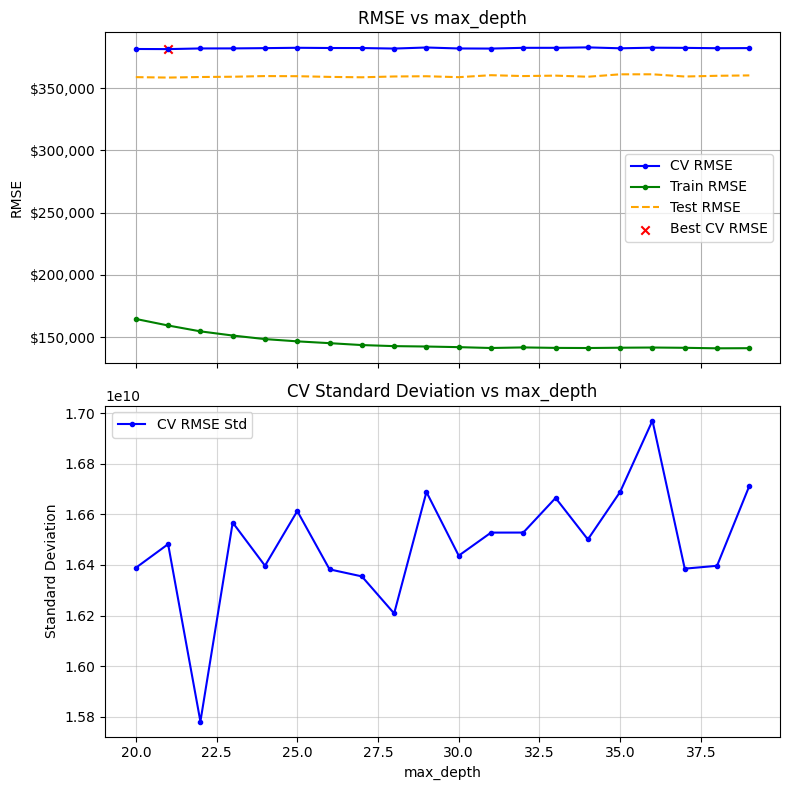

Execution Time: 01:45:07

Parameter max_depth = 21 RMSE = $381,264.38

{'n_estimators': 410, 'max_features': 15, 'max_depth': 21, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145362530371.57404}
[{'n_estimators': 490, 'max_features': None, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': 147797280919.67545}, {'n_estimators': 490, 'max_features': 15, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145550963251.203}, {'n_estimators': 410, 'max_features': 15, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145403590281.58295}, {'n_estimators': 410, 'max_features': 15, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145403590281.58295}, {'n_estimators': 410, 'max_features': 15, 'max_depth': 21, 'bootstrap': True, 'random_state': 42, 'MSE_found': 145362530371.57404}]


In [49]:
parameters_and_ranges_rf = [('n_estimators', range(300,501,10)), ('max_features', range(10,31,1)), ('max_depth', range(20,40,1))]

for (param, parameter_list) in parameters_and_ranges_rf:
    #run more jobs
    Params_RF = sweep_parameter(RandomForestRegressor,Params_RF, param, parameter_list, n_jobs =5, n_repeats= 2)

    print(f"\nParameter {param} = {Params_RF[param]} RMSE = ${Params_RF['MSE_found'] ** 0.5:,.2f}\n" )
    print(Params_RF)
    Params_RF_List.append(Params_RF)

print(Params_RF_List)

After completion of the feature engineering. We re-ran the dataset through all of the regressors to verify if our numbers were still consistent with our previous findings. </br>
Results improved slightly for each of the regressors, but random forest still performed best out of the set.
We can hypothesize that dataset is behaving after the feature engineering and that computational power can be reserved to reverify the best parameters for just random forest. </br>
Continuing our investigation, we executed a forward feature selection instead of the backward feature selection to find the best outcome. Then we performed a parameter sweep to find the best parameters for the random forest regression.

With the changes made on part 1 for milestone 1 (feature processing) and part 2 for milestone 2 (backward feature selection & random forest regressor), MSE was slightly improved. From 384836.9101 to 383874.81.</br>
Observing the parameters selected, we can see that the parameters are are not over-simplified nor extremely high compute. Looking at the "n_estimators" parameter there may be an higher estimator count that performs slightly better but cost versus benefit is lost at the increment of improvement it is trending at currently. </br>
'n_estimators': 490, 'max_features': 15, 'max_depth': 21, 'bootstrap': True
Finally, we will run the final model below with applying both changes we made during our Part A.
1) Feature engineer the 'garagetotalsqft' based on the presence of a garage in the house.
2) Use forward feature selection instead of backward feature selection. 
3) Use the best parameters found during the parameter sweep : {'n_estimators': 490, 'max_features': 15, 'max_depth': 21, 'bootstrap': True}</br>


In [50]:
Final_Parameters_Random_Forests = {
    'n_estimators': 490,         # Number of base estimators in the ensemble
    'max_features': 15,        # Number of features to consider when looking for the best split 
    'max_depth'   : 21,        # Limits the depth of each tree
    'bootstrap'   : True,        # Use bootstrap samples when building estimators
    'random_state': 42,          # Ensures reproducibility                   
}

In [52]:
def run_model( X_train, y_train, X_test, y_test, **Final_Parameters_Random_Forests):
    model = RandomForestRegressor(**Final_Parameters_Random_Forests)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    mse_score = -cross_val_score(model, X_train_scaled, y_train,scoring = 'neg_mean_squared_error',
                                     cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42), n_jobs  = 5).mean()
    
   
    # Fit the model on the full training set
    model.fit(X_train_scaled, y_train)
    
    # Compute training MSE and testing MSE
    train_preds = model.predict(X_train_scaled)
    train_mse   = mean_squared_error(y_train, train_preds)
    test_preds  = model.predict(X_test)
    test_mse    = mean_squared_error(y_test, test_preds)
    
    return mse_score, train_mse, test_mse

In [56]:


mse_score, train_mse, test_mse = run_model(X_train_scaled, y_train, X_test, y_test)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [55]:
print(f"\n Final Model RMSE: {sqrt(mse_score)} ")


 Final Model RMSE: 384184.8377526109 


## Part B: Final Data Science Project Report Assignment [30 pts]

This final report is the culmination of your semester-long Data Science project, building upon the exploratory analyses and modeling milestones you've already completed. Your report should clearly communicate your findings, analysis approach, and conclusions to a technical audience. The following structure and guidelines, informed by best practices, will help you prepare a professional and comprehensive document.

### Required Sections

Your report must include the following sections:


#### 1. Executive Summary (Abstract) [2 pts]
- Brief overview of the entire project (150–200 words)
- Clearly state the objective, approach, and key findings

This project aimed to build a predictive model for estimating property tax values using a dataset that includes various characteristics of residential properties. The objective was to apply the complete data science workflow from data cleaning and preprocessing to modeling and evaluation while gaining insight into which features most influence housing valuations.  
  
We began by analyzing the dataset’s structure, identifying and addressing issues such as missing values, inconsistent records, and feature redundancy. Several feature engineering techniques were employed to improve the dataset’s structure, including encoding categorical variables, applying log and polynomial transformations, and creating interaction terms.  
  
Multiple regression models were tested and evaluated using repeated cross-validation to ensure consistency and reliability. The primary performance metric used was RMSE, allowing us to measure the average error in predicted tax values. Through this process, we were able to identify a high-performing model and the key features contributing to its predictions.  
The results demonstrate the value of combining rigorous preprocessing with ensemble modeling techniques and provide a strong foundation for further work in real estate price prediction.

#### 2. Introduction [2 pts]
- Clearly introduce the topic and context of your project
- Describe the problem you are addressing (the problem statement)
- Clearly state the objectives and goals of your analysis

Note: You may imaginatively consider this project as taking place in a real estate company with a small data science group in-house, and write your introduction from this point of view (don't worry about verisimilitude to an actual company!).  

In today’s competitive real estate market, accurately estimating the value of residential properties is essential for informed decision-making by buyers, sellers, and investors. Real estate companies increasingly rely on data-driven models to provide reliable pricing estimates that reflect a property’s characteristics and market trends. Within our data science team, we were tasked with developing a predictive model to estimate the assessed tax value of homes based on a variety of structural, geographical, and usage-related features.  
  
The dataset provided for this project includes numerous descriptors such as square footage, number of bedrooms and bathrooms, year built, lot size, and other property-specific attributes. However, it also presents challenges commonly found in real-world data, including missing values, inconsistent reporting, and redundant or low-value features.  
  
The primary objective of this project is to create a model that can accurately predict the target variable (taxvaluedollarcnt) using these features. Our goals include building a clean and reliable dataset, selecting and engineering meaningful features, evaluating multiple regression models, and identifying the approach that offers the most accurate and stable performance. In doing so, we aim to provide actionable insights that can enhance internal valuation tools and support strategic business decisions across our company.

#### 3. Data Description [2 pts]
- Describe the source of your dataset (described in Milestone 1)
- Clearly state the characteristics of your data (size, types of features, missing values, target, etc.)

The dataset used in this project is a curated academic subset of Zillow’s internal property database. It includes 77,613 rows and 55 features, each describing residential properties with a mix of physical, geographical, and financial attributes. The target variable is taxvaluedollarcnt, which reflects the assessed tax value of each property.  
  
The features are a mix of numerical and categorical variables. Numerical features capture characteristics such as square footage (calculatedfinishedsquarefeet, lotsizesquarefeet), number of bedrooms and bathrooms, construction year, and various tax-related values. Categorical variables include propertylandusetypeid, airconditioningtypeid, and zoningdesc, many of which are represented by numeric codes.  
  
The dataset presents several data quality challenges. A number of features exhibit significant missingness:
- Some columns, like architecturalstyletypeid, basementsqft, and decktypeid, are missing in over 99% of rows.
- Other columns such as garagecarcnt, airconditioningtypeid, and buildingqualitytypeid have more moderate missing rates, ranging from 35% to 67%.
- In contrast, essential features like bathroomcnt, bedroomcnt, and calculatedfinishedsquarefeet are nearly complete, missing in less than 1% of entries.  
  
Several fields were determined to be non-informative or unsuitable for modeling:
- Parcelid serves as a unique identifier and was excluded to avoid data leakage.
- Geolocation fields like latitude, longitude, and censustractandblock were reviewed for redundancy and relevance.
- Features with extremely low variance (such as decktypeid, which only contains one unique value) or known data entry errors were removed during preprocessing.
  
Overall, this dataset provided a rich but imperfect foundation, requiring thoughtful cleaning and feature selection strategies to prepare it for robust modeling and analysis.

#### 4. Methodology (What you did, and why)  [12 pts]

**Focus this section entirely on the steps you took and your reasoning behind them. Emphasize the process and decision-making, not the results themselves**

- Describe your analytical framework 
  - Use of validation curves to see the effect of various hyperparameter choices, and
  - Choice of RMSE as primary error metric
- Clearly outline your data cleaning and preprocessing steps
  - Describe what issues you encountered in the raw data and how you addressed them.
  - Mention any key decisions (e.g., removing samples with too many missing values).
  - What worked and what didn't work?
- Describe your feature engineering approach
  - Explain any transformations, combinations, or derived features.
  - Discuss why certain features were chosen or created, even if they were later discarded.
  - What worked and what didn't work?
- Detail your model selection process 
  - Outline the models you experimented with and why.
  - Discuss how you evaluated generalization (e.g., cross-validation, shape and relationships of plots).
  - Mention how you tuned hyperparameters or selected the final model.



**Analytical Framework**  
Our analytical process was designed around a classic supervised machine learning workflow, guided by practical considerations for model interpretability, generalizability, and performance. The primary objective was to build regression models capable of predicting property tax values (taxvaluedollarcnt) using structured real estate data.  
  
To ensure consistent and meaningful evaluation, we used Root Mean Squared Error (RMSE) as our primary metric. RMSE provides a direct measure of the average magnitude of prediction error in the same unit as the target variable (U.S. dollars), making it highly interpretable for stakeholders in real estate valuation. Its sensitivity to large errors also aligns well with the presence of high-value properties in the dataset, where even small percentage errors translate to large dollar impacts.  
  
We applied repeated k-fold cross-validation throughout our modeling stages to reduce the variance associated with single train-test splits. This strategy provided a more robust estimate of each model’s generalization error across different data partitions.  
  
In the final phase, validation curves and RandomizedSearchCV were used to explore hyperparameter spaces for tree-based ensemble models (Random Forest, Gradient Boosting, Bagging). These curves helped identify saturation points where increasing complexity no longer improved performance and guided the tuning process to avoid overfitting. For instance, we observed diminishing returns beyond a certain number of estimators or depth in Random Forest, and adjusted parameters accordingly.  
  
What worked: RMSE gave us a clear, interpretable benchmark for comparing model performance. Repeated CV reduced the impact of randomness in splits, and validation curves helped us make informed, data-driven tuning decisions.  
  
What didn’t work: While RMSE served well overall, it may have overly penalized a few high-error predictions on outliers, which skewed early model evaluations. This was later balanced by analyzing distributions of errors during tuning.  
  
**Data Cleaning & Preprocessing**  
The raw dataset presented several common real-world challenges, including missing values, redundant features, and data inconsistencies. Our goal was to address these issues in a principled way that preserved the integrity of the remaining data while preparing it for modeling.  
  
Handling Missing Values:  
- A significant portion of the dataset included columns with extremely high missingness (basementsqft, decktypeid, and buildingclasstypeid, all with >98% missing values). These were dropped entirely, as imputing such sparse columns would introduce more noise than signal. Features with moderate missingness (such as buildingqualitytypeid, garagecarcnt, or garagetotalsqft) were retained and imputed using strategies that reflected the context of each variable.  
- For binary or flag-type features (hashottuborspa, taxdelinquencyflag), we filled NaNs with 0, assuming absence when no data was provided.
- For count-related features like numberofstories or unitcnt, missing values were filled with 1, assuming single-unit, single-story homes by default.
- For continuous variables such as lot size or square footage, missing values were filled using the median or grouped means when available (average garagetotalsqft for homes reporting a garage).  
  
Key decisions:  
- We retained variables with up to ~35% missing values if they had potential predictive value and could be reasonably imputed.
- We dropped rows with missing values in key columns only when those columns had very low missingness (<5%) to maintain data volume and integrity.
- We created and saved a cleaned version of the dataset (zillow_cleaned.csv) to ensure consistent reuse across milestones.

Dealing with Redundant or Useless Features:  
- Unique identifiers (parcelid) and raw geolocation features (latitude, longitude) were dropped, as they don’t hold predictive value without contextual mapping.
- Some numeric-encoded categorical features (regionidzip, propertyzoningdesc) were retained for possible one-hot encoding due to their expected importance.

What worked:  
The targeted imputation strategy helped preserve valuable information while avoiding over-engineering. Cleaning steps reduced feature dimensionality significantly and improved downstream model stability.  
  
What didn’t work:  
Some features like fireplaceflag or finishedsquarefeet6 showed redundancy or implausible values and required extra scrutiny. Additionally, relying too heavily on imputation for rare features (like decktypeid) didn’t yield much improvement and were eventually dropped.    
  
**Feature Engineering Approach**  
To enhance model performance and capture more nuanced relationships between features and the target variable, we applied several feature engineering techniques based on insights from exploratory data analysis.  
  
We began by creating interaction terms, such as bathroomcnt * bedroomcnt, and squared terms like calculatedfinishedsquarefeet ** 2, motivated by strong correlations observed during initial analysis. These combinations helped capture nonlinear dependencies, particularly among size- and usage-related variables. For example, while bedroomcnt and bathroomcnt individually correlated moderately with tax value, their interaction proved even more predictive for certain models.  
  
We also applied log transformations to highly skewed features, including the target variable taxvaluedollarcnt and calculatedfinishedsquarefeet, to reduce the impact of outliers and better approximate normality. These log-transformed versions were particularly beneficial for linear models, stabilizing variance and improving generalization.  
  
Additionally, we performed one-hot encoding on key categorical variables such as airconditioningtypeid, heatingorsystemtypeid, and propertylandusetypeid. While this increased dimensionality, it provided meaningful signals to tree-based models. Some categorical features like hashottuborspa or fireplaceflag were excluded due to extreme sparsity or redundancy with other variables (fireplacecnt).  
  
Although some engineered features were eventually discarded, such as complex polynomial combinations that introduced multicollinearity the process helped refine our understanding of feature importance. Ultimately, the most valuable engineered terms were simple transformations or interactions grounded in domain knowledge and EDA findings.  
  
These steps helped improve model performance across several algorithms, especially for regularized linear models, while reinforcing the importance of domain-informed transformations.  
  
**Model Selection Process**  
To establish robust predictive performance, we experimented with a range of regression models including Linear Regression, Ridge and Lasso Regression, Decision Tree, Random Forest, Bagging, and Gradient Boosting. Our goal was to evaluate both linear and ensemble models to determine which best captured the structure of the data.  
  
Model evaluation was performed using repeated cross-validation (5 folds, 5 repeats) with Root Mean Squared Error (RMSE) as the primary metric. RMSE was selected for its interpretability being in the same units as the target variable and its sensitivity to large errors, which is crucial in housing price prediction.  
  
During baseline testing with default hyperparameters, ensemble models consistently outperformed linear models. Random Forest, Bagging, and Gradient Boosting achieved the lowest RMSE scores, indicating their ability to model non-linear relationships and interactions effectively.  
  
Hyperparameter tuning was then conducted using RandomizedSearchCV within pipelines that included scaling, imputation, and model fitting. Key parameters tuned included tree depth, number of estimators, minimum samples per leaf, and learning rates. This process led to further performance improvements, particularly for Random Forest and Gradient Boosting, which benefitted from deeper trees and carefully controlled sample usage.  
  
We also tested various subsets of features using feature selection techniques like backward elimination, Lasso-based selection, and importance rankings from tree models. While simple models like Linear Regression were highly sensitive to irrelevant features, ensemble models proved more robust. Notably, Gradient Boosting maintained strong performance even with reduced feature sets, confirming its stability and generalization capacity.  
  
In conclusion, the model selection phase reinforced the importance of ensemble methods for this prediction task. Among them, Random Forest and Gradient Boosting offered the best trade-off between accuracy, interpretability, and stability, particularly when paired with informed feature engineering and tuning strategies.

#### 5. Results and Evaluation (What you found, and how well it worked) [10 pts]

**Focus purely on outcomes, with metrics, visuals, and insights. This is where you present evidence to support your conclusions.**

- Provide a clear and detailed narrative of your analysis and reasoning using the analytical approach described in (4). 
- Discuss model performance metrics and results (RMSE, R2, etc.)
- **Include relevant visualizations (graphs, charts, tables) with appropriate labels and captions**
- Error analysis
  - Highlight specific patterns of error, outliers, or questionable features.
  - Note anything surprising or worth improving in future iterations.


#### 6. Conclusion [2 pts]
- Clearly state your main findings and how they address your original objectives
- Highlight the business or practical implications of your findings 
- Discuss the limitations and constraints of your analysis clearly and transparently
- Suggest potential improvements or future directions